# Spacial System Project - Yelp Dataset
## Zhilin Cai 16049543

## 1. Introduction

Round 9 Yelp dataset consists of information about local business in nearly 800 geographical areas or cities across 29 states. In general, this set includes 4.1M reviews and 947K tips by 1M users for 144K businesses. There are mainly five JSON files in the dataset storing information about business, review, user, checkin and tip respectively, each of which is composed of a single object type, one json-object per-line. By using a json-to-csv converter provided by Yelp, I firstly convert json files into csv files to be used in Jupyter notebook. 
I will focus on analysis of business, review and user in this notebook. The city I choose is Edinburgh.

In this notebook, I will use the following libraries: pandas, pyproj, bokeh, ast, collections, matplotlib, numpy, seaborn, scipy and sklearn. To avoid any possible problem, try python 2 first.

## 2. Data Cleaning

I will import CSV data using Pandas, so I need to import library firstly. Then I read csv files in the same directory.

In [1]:
import pandas as pd

In [2]:
# df_business = pd.read_csv('yelp_academic_dataset_business.csv')
# df_review = pd.read_csv('yelp_academic_dataset_review.csv')
# df_user = pd.read_csv('yelp_academic_dataset_user.csv')

Edinburgh is my target city so I need to filter out data of Edinburgh from the above csv files. 'City' column in business file can be used to filter out business data of Edinburgh directly. Once I have business data, I can filter out other data of Edinburgh by using business_id. Specifically, I put unique 'business_id' of Edinburgh into a new dataframe and merge it with original review file.

In [3]:
# df_business_edinburgh = df_business.ix[(df_business['city'] == 'Edinburgh')].reset_index().drop('index',axis=1)
# df_businessid_edinburgh = pd.DataFrame(df_business_edinburgh.business_id.unique()).rename(columns={0:'business_id'})
# df_review_edinburgh = pd.merge(df_businessid_edinburgh, df_review, how='inner', on='business_id')

About user data, I will focus on those who have left at least 1 review to businesses in Edinburgh. Thus, I filter out unique 'user_id' in reviews of Edinburgh, then merge it with original user file.

In [4]:
# df_userid_edinburgh = pd.DataFrame(df_review_edinburgh.user_id.unique()).rename(columns={0:'user_id'})
# df_user_edinburgh = pd.merge(df_userid_edinburgh, df_user, how='inner', on='user_id')

By far, I have got data of Edinburgh including business, review and user. Due to the large size of original dataset, I save data of Edinburgh into csv files for the convenience of reading data.

In [5]:
# df_business_edinburgh.to_csv('df_business_edinburgh.csv', index=False)
# df_review_edinburgh.to_csv('df_review_edinburgh.csv', index=False)
# df_user_edinburgh.to_csv('df_user_edinburgh.csv', index=False)

Then I am able to start my exploration with new data. Now, read my cleaned data.

In [6]:
df_business_edinburgh = pd.read_csv('df_business_edinburgh.csv')
df_review_edinburgh = pd.read_csv('df_review_edinburgh.csv')
df_user_edinburgh = pd.read_csv('df_user_edinburgh.csv')

## 3. Exploration & Experiments
### 3.1 Business

Let's first have a look at business data and its basic information.

In [7]:
df_business_edinburgh.head(5)

,neighborhood,business_id,hours,is_open,address,attributes,categories,city,review_count,name,longitude,state,stars,latitude,postal_code,type
0,New Town,NsarUMMMPOlMBb6K04x6hw,"['Monday 7:30-17:30', 'Tuesday 7:30-17:30', 'W...",0,"7A Castle Street, Corstorphine","['Alcohol: none', 'GoodForKids: True', ""GoodFo...","['Food', 'Fast Food', 'Restaurants', 'Juice Ba...",Edinburgh,8,Juice Almighty,-3.202660,EDH,4.5,55.951461,EH2 3AH,business
1,New Town,AOMZ8esnjwqRHVUe_zvNGg,"['Monday 11:0-0:0', 'Tuesday 11:0-0:0', 'Wedne...",1,39 Jamaica Street W,"['Alcohol: full_bar', ""Ambience: {'romantic': ...","['Nightlife', 'Pubs', 'Bars']",Edinburgh,18,Kay's Bar,-3.205037,EDH,4.5,55.955600,EH3 6HF,business
2,NaN,0N22PPxNdJRaT9fEZQ3Kdg,NaN,1,The Meadows,NaN,"['Active Life', 'Playgrounds']",Edinburgh,3,The Meadows Playground,-3.316606,EDH,4.5,55.910629,EH14 4,business
3,Old Town,jLgv1u30RS95T6cK8bqbBg,NaN,1,"15 Johnston Terrace, Old Town",['DogsAllowed: False'],"['Hostels', 'Hotels & Travel']",Edinburgh,16,Castle Rock Hostel,-3.196024,EDH,4.5,55.948323,EH1 2PW,business
4,Old Town,q7HU-nMTHnsMqgCQQziQUw,"['Monday 9:0-18:0', 'Tuesday 9:0-18:0', 'Wedne...",1,"145 Canongate, The Royal Mile","['BusinessAcceptsCreditCards: True', ""Business...","['Flowers & Gifts', 'Shopping', 'Hobby Shops']",Edinburgh,11,Ye Olde Christmas Shoppe,-3.178679,EDH,3.5,55.951717,EH8 8BN,business


In [8]:
# Check basic information
df_business_edinburgh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Data columns (total 16 columns):
neighborhood    3051 non-null object
business_id     3601 non-null object
hours           2575 non-null object
is_open         3601 non-null int64
address         3576 non-null object
attributes      3193 non-null object
categories      3600 non-null object
city            3601 non-null object
review_count    3601 non-null int64
name            3601 non-null object
longitude       3601 non-null float64
state           3601 non-null object
stars           3601 non-null float64
latitude        3601 non-null float64
postal_code     3587 non-null object
type            3601 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 450.2+ KB


Since there are longitude and latitude for each business, I am able to visualise them on a map. I need to convert longitude and latitude into web mercator coordinates: 'lon_x' and 'lat_y' by using pyproj. They will then be used for visulisation by using Bokeh, which is a Python interactive visualization library. 
Firstly, I check if there is any null value in our data.

In [9]:
df_business_edinburgh.isnull().any()

neighborhood     True
business_id     False
hours            True
is_open         False
address          True
attributes       True
categories       True
city            False
review_count    False
name            False
longitude       False
state           False
stars           False
latitude        False
postal_code      True
type            False
dtype: bool

No missing value in longitude and latitude, so I can start converting.

In [10]:
from pyproj import Proj, transform
inProj = Proj(init='epsg:3857')
outProj = Proj(init='epsg:4326')

Two functions are defined to convert web mercator coordinates x and y respectively.

In [11]:
def lon_to_web_mercator(data):
    x1 = data.longitude
    y1 = data.latitude
    x2, y2 = transform(outProj,inProj,x1,y1)
    return x2

def lat_to_web_mercator(data):
    x1 = data.longitude
    y1 = data.latitude
    x2, y2 = transform(outProj,inProj,x1,y1)
    return y2

Use .apply() to apply the function that I defined on each row of the dataframe.

In [12]:
df_business_edinburgh['lon_x'] = df_business_edinburgh.apply(lon_to_web_mercator,axis=1)
df_business_edinburgh['lat_y'] = df_business_edinburgh.apply(lat_to_web_mercator,axis=1)

Check the range of 'lon_x' and 'lat_y' by using .describe() so that I can set the range of my initial view of the map.

In [13]:
df_business_edinburgh.describe()

,is_open,review_count,longitude,stars,latitude,lon_x,lat_y
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3.601000e+03
mean,0.818384,12.630380,-3.196085,3.803943,55.949632,-355786.543475,7.548396e+06
std,0.385581,17.677458,0.030574,0.690327,0.012908,3403.441883,2.566902e+03
min,0.000000,3.000000,-3.657319,1.000000,55.856146,-407130.844221,7.529832e+06
25%,1.000000,4.000000,-3.205826,3.500000,55.943534,-356870.917035,7.547183e+06
50%,1.000000,7.000000,-3.192822,4.000000,55.949799,-355423.276342,7.548429e+06
75%,1.000000,13.000000,-3.184209,4.500000,55.954843,-354464.479932,7.549431e+06
max,1.000000,330.000000,-2.785495,5.000000,56.178045,-310079.929535,7.593941e+06


In [14]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [15]:
EDB = x_range, y_range = ((df_business_edinburgh['lon_x'].min(),df_business_edinburgh['lon_x'].max()), (df_business_edinburgh['lat_y'].min(),df_business_edinburgh['lat_y'].max()))
plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5, alpha=0.5)

In [16]:
from bokeh.tile_providers import STAMEN_TERRAIN

def plot_map(business_dataframe):
    samples = business_dataframe
    p = base_plot()
    p.add_tile(STAMEN_TERRAIN)
    p.circle(x=samples['lon_x'], y=samples['lat_y'], **options)
    show(p)

In [17]:
plot_map(df_business_edinburgh)

As can be seen, there are some outliers which are far away from Edinburgh. I just wanna focus on businesses in the city so I then reorder the data by 'lon_x' and 'lat_y' respectively and roughly drop some possible outliers. Reasons for those outliers may be that they provide wrong information to Yelp.

In [18]:
df_business_edinburgh_clean = df_business_edinburgh.sort_values('lon_x',ascending=False).iloc[10:3580]
df_business_edinburgh_clean = df_business_edinburgh_clean.sort_values('lat_y',ascending=False).iloc[1:3550]

In [19]:
%%time
EDB = x_range, y_range = ((df_business_edinburgh_clean['lon_x'].min(),df_business_edinburgh_clean['lon_x'].max()), (df_business_edinburgh_clean['lat_y'].min(),df_business_edinburgh_clean['lat_y'].max()))

plot_map(df_business_edinburgh_clean)

CPU times: user 51.8 ms, sys: 3.22 ms, total: 55.1 ms
Wall time: 53.8 ms


So, the map above shows the distribution of all businesses of Edinburgh on Yelp. Since the transparency value 'alpha' is set to 0.5, the deeper color on the map means more businesses overlaps in this area. As can be seen, most of businesses are located in the center of Edinburgh as well as the area by the sea and distributed along the main roads of the city. Specifically, I want to investigate the businesses disribution of some interesting categories. I need to check the 'categories' attribute.

In [20]:
df_business_edinburgh_clean.dtypes

neighborhood     object
business_id      object
hours            object
is_open           int64
address          object
attributes       object
categories       object
city             object
review_count      int64
name             object
longitude       float64
state            object
stars           float64
latitude        float64
postal_code      object
type             object
lon_x           float64
lat_y           float64
dtype: object

Although 'categories' in business looks like a list, it is object(string) in fact. So I need to convert the string representation of list to list by using ast.literal_eval().
Since it shows there are missing values in 'categories' when I checked before, I need to consider if I have to drop the data with missing value.

In [21]:
df_business_edinburgh_clean[df_business_edinburgh_clean.categories.isnull()]

,neighborhood,business_id,hours,is_open,address,attributes,categories,city,review_count,name,longitude,state,stars,latitude,postal_code,type,lon_x,lat_y
2159,NaN,e65oeKwROETQXWqT8YaXMA,"['Monday 17:0-23:0', 'Tuesday 17:0-23:0', 'Wed...",1,43 Longstone Road,NaN,NaN,Edinburgh,3,Gino's Fish & Chicken Bar,-3.260928,EDH,2.0,55.92515,EH14 2BB,business,-363004.866737,7.543530e+06


From the name of this business, it probably a restaurant. So I decide to label it with 'Restaurants'.

In [22]:
index_of_missing_data = df_business_edinburgh_clean[df_business_edinburgh_clean.categories.isnull()].index[0]
df_business_edinburgh_clean['categories'][index_of_missing_data] = "['Restaurants']"

In [23]:
# Convert to list
import ast
df_business_edinburgh_clean['list_categories'] = df_business_edinburgh_clean['categories'].apply(ast.literal_eval)

In [24]:
cat_list = []
for item in df_business_edinburgh_clean.list_categories:
     cat_list += item

set() can filter out unique values in a list.

In [25]:
# Check the length of category list
len(set(cat_list))

446

In [26]:
# Sort category list in descending order of frequency
from collections import Counter
Counter(cat_list).most_common()

[('Restaurants', 1399),
 ('Food', 772),
 ('Shopping', 771),
 ('Nightlife', 589),
 ('Bars', 527),
 ('Coffee & Tea', 393),
 ('Pubs', 332),
 ('Fashion', 244),
 ('Event Planning & Services', 212),
 ('Hotels & Travel', 205),
 ('Fast Food', 204),
 ('Arts & Entertainment', 178),
 ('Beauty & Spas', 169),
 ('British', 158),
 ('Cafes', 140),
 ('Italian', 132),
 ('Flowers & Gifts', 120),
 ('Hotels', 119),
 ('Sandwiches', 111),
 ('Indian', 105),
 ('Specialty Food', 101),
 ('Active Life', 96),
 ('Local Flavor', 93),
 ("Women's Clothing", 93),
 ('Local Services', 83),
 ('Arts & Crafts', 83),
 ('Bakeries', 83),
 ('Mags', 80),
 ('Music & Video', 80),
 ('Books', 80),
 ('Chinese', 79),
 ('Grocery', 78),
 ('Wine & Spirits', 77),
 ('Beer', 77),
 ('Accessories', 76),
 ('Hair Salons', 73),
 ('Breakfast & Brunch', 71),
 ('Gastropubs', 69),
 ('Health & Medical', 67),
 ('Delis', 65),
 ("Men's Clothing", 60),
 ('Scottish', 58),
 ('Home & Garden', 58),
 ('Public Services & Government', 57),
 ('Pizza', 55),
 ('Fr

In [27]:
business_dataframe = df_business_edinburgh_clean.copy()
p = base_plot()
p.add_tile(STAMEN_TERRAIN)
option1 = dict(line_color=None, fill_color='hotpink', size=5, alpha=0.8)
option2 = dict(line_color=None, fill_color='green', size=5, alpha=0.8)
option3 = dict(line_color=None, fill_color='deepskyblue', size=5, alpha=0.8)
option4 = dict(line_color=None, fill_color='yellow', size=5, alpha=0.8)
option5 = dict(line_color=None, fill_color='orange', size=5, alpha=0.8)

british = business_dataframe[business_dataframe.categories.str.contains('British', na = False)]
italian = business_dataframe[business_dataframe.categories.str.contains('Italian', na = False)]
indian = business_dataframe[business_dataframe.categories.str.contains('Indian', na = False)]
chinese = business_dataframe[business_dataframe.categories.str.contains('Chinese', na = False)]
scottish = business_dataframe[business_dataframe.categories.str.contains('Scottish', na = False)]

p.circle(x=british['lon_x'], y=british['lat_y'], **option1)
p.circle(x=italian['lon_x'], y=italian['lat_y'], **option2)
p.circle(x=indian['lon_x'], y=indian['lat_y'], **option3)
p.circle(x=chinese['lon_x'], y=chinese['lat_y'], **option4)
p.circle(x=scottish['lon_x'], y=scottish['lat_y'], **option5)
show(p)

As shown in the map above, 'British' are in hotpink, 'Italian' are in green, 'Indian' are in deepskyblue, 'Chinese' are in yellow and 'Scottish' are in orange. They are the most frequent labels of businesses about country/area. 

Generally, most of them are located around new town and old town area, in which there are the most famous street in Edingburgh: Prince Street and Royal Mile. Leith also looks like a busy district, which is the port of Edinburgh. I believe most of them are restaurants and stores. 'Indian' and 'Chinese' businesses are relatively more widely spread than others. 'British' and 'Scottish' are mainly located at the center of Edinbugh. It is reasonable because that as a famous Scottish city Edinburgh attracts a large amount of tourists every year. The location in city center can bring scotish businesses such as restaurants and shops more revenue by selling specialty.

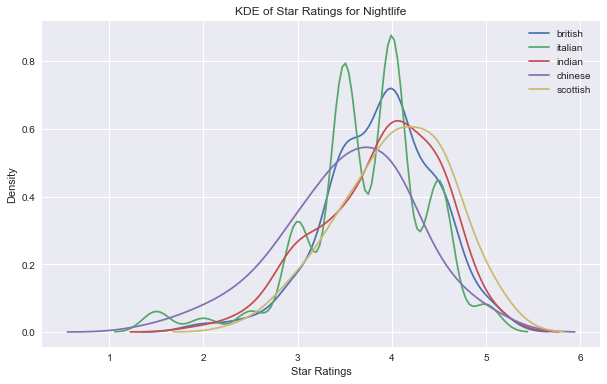

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig2 = plt.figure(figsize=(10,6))
sns.kdeplot(british['stars'],label='british')
sns.kdeplot(italian['stars'],label='italian')
sns.kdeplot(indian['stars'],label='indian')
sns.kdeplot(chinese['stars'],label='chinese')
sns.kdeplot(scottish['stars'],label='scottish')
plt.title('KDE of Star Ratings for Nightlife')
plt.xlabel("Star Ratings")
plt.ylabel("Density")
plt.grid(True)
plt.legend();

To compare the star ratings of businesses in the above categories, I plot a kernel density estimation as shown above. It can be seen that ratings of 'Scottish' and 'Indian' distribute in higher ratings while 'British' and 'Chinese' concentrates the medium between 3 and 4. 'Italian' has not only high ratings but also low ratings.

A function named 'plot_moments' is defined to plot the histogram of star rating distribution and output first moments as follows. Matplotlib, numpy and scipy are used in the function.

In [29]:
import numpy as np
from scipy import stats

def plot_moments(df,category="none"):
    df = df[df.categories.str.contains(category, na = False)]
    series = df['stars']
    x = series.unique()
    x.sort()
    y = []
    fig1 = plt.figure(figsize=(8,6))
    for i in x:
        y.append(series.value_counts()[i])
    plt.bar((x*2.5),y, tick_label = x, align='center')
    if category != "none":
        plt.title('Histogram of {0} Ratings for {1}. Total Count: {2}'.format(category,'Edinburgh', len(series)))
    else:
        plt.title('Histogram of Ratings for Businesses in {0}. Total Count: {1}'.format('Edinburgh', len(series)))
    plt.grid(True)
    plt.xlabel('Star Rating')
    plt.ylabel('Frequency')
    plt.show()
    
    mean = np.mean(series)
    variance = np.var(series)
    skewness = stats.skew(series)
    kurtosis = stats.kurtosis(series,fisher=False)
    print('First Moments:')
    print('------------------------------------------------------------------')
    print('Mean: {:0.3f} | Variance: {:0.3f} | Skewness: {:0.3f} | Kurtosis: {:0.3f}'.format(mean,variance,skewness,kurtosis))

Another function named 'plot_colourful_map2' is defined to plot the distribution of businesses in a specific category in a map with different colors according to its star rating. If the business has a higher star rating, it is in deeper color, otherwise it is in lighter color.

In [30]:
def plot_colourful_map2(business_dataframe, category="none", rating = 'none'):
    samples = business_dataframe
    p = base_plot()
    p.add_tile(STAMEN_TERRAIN)
    
    scottish = business_dataframe[business_dataframe.categories.str.contains(category, na = False)]
    
    option1 = dict(line_color=None, fill_color='greenyellow', size=5, alpha=0.8)
    option2 = dict(line_color=None, fill_color='yellow', size=5, alpha=0.8)
    option3 = dict(line_color=None, fill_color='gold', size=5, alpha=0.8)
    option4 = dict(line_color=None, fill_color='orange', size=5, alpha=0.8)
    option5 = dict(line_color=None, fill_color='darkorange', size=5, alpha=0.8)

    scottish1 = scottish.ix[(scottish['stars'] <= 3)]
    scottish2 = scottish.ix[(scottish['stars'] == 3.5)]
    scottish3 = scottish.ix[(scottish['stars'] == 4)]
    scottish4 = scottish.ix[(scottish['stars'] == 4.5)]
    scottish5 = scottish.ix[(scottish['stars'] == 5)]
    
    if rating == 'all':
        p.circle(x=scottish1['lon_x'], y=scottish1['lat_y'], **option1)
        p.circle(x=scottish2['lon_x'], y=scottish2['lat_y'], **option2)
        p.circle(x=scottish3['lon_x'], y=scottish3['lat_y'], **option3)
        p.circle(x=scottish4['lon_x'], y=scottish4['lat_y'], **option4)
        p.circle(x=scottish5['lon_x'], y=scottish5['lat_y'], **option5)
    if rating == 'best':
        p.circle(x=scottish5['lon_x'], y=scottish5['lat_y'], **option5)
    if rating == 'worst':
        scottish6 = scottish.ix[(scottish['stars'] < 3)]
        p.circle(x=scottish6['lon_x'], y=scottish6['lat_y'], **option1)
    show(p)

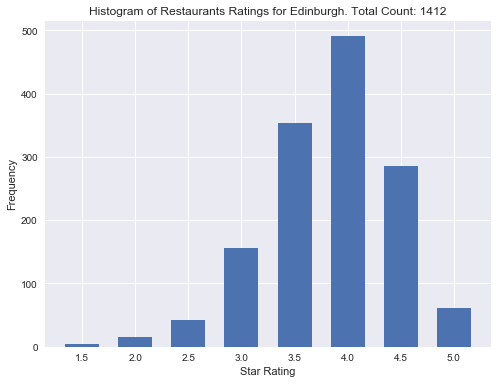

First Moments:
------------------------------------------------------------------
Mean: 3.833 | Variance: 0.374 | Skewness: -0.555 | Kurtosis: 3.605


In [31]:
plot_moments(df_business_edinburgh,'Restaurants')

As indicated in the histogram of restaurants ratings in Edingbugh, most of the restaurants enjoy a medium star rating on Yelp; there are a small amount of restaurants are able to get 5 star rating and few restaurants get ratings lower than 2.5. The mean rating of all of them is 3.8, which means it deserves a study if a tourist want to go to the most popular restaurants with best reputation in Edinburgh.

In [32]:
plot_colourful_map2(df_business_edinburgh.ix[(df_business_edinburgh.review_count>10)],'Restaurants', 'all')

Let's move on to the map. The distribution of all restaurants shows again that most restaurants of Edinburgh on Yelp have a medium star rating. 

The best resaurants with 5 star ratings and worst resaurants with star ratings lower than 3 with more than 5 reviews are plotted on the maps below alone respectively to avoid some extreme cases. It seems the best restaurants are more evenly spread throughout the city. 
While the worst restaurants seem concentrate the center of Edinburgh, which is the popular area for tourists. The possible reason might be that to get more revenue from so many tourists, these restaurants sacrifice some services.

In [33]:
plot_colourful_map2(df_business_edinburgh.ix[(df_business_edinburgh.review_count>5)],'Restaurants', 'best')

In [34]:
plot_colourful_map2(df_business_edinburgh.ix[(df_business_edinburgh.review_count>5)],'Restaurants', 'worst')

### 3.2 User & Review

Let's move on to user data.

In [35]:
df_user_edinburgh.head(5)

,user_id,yelping_since,useful,compliment_photos,compliment_list,compliment_funny,compliment_plain,review_count,elite,fans,...,compliment_writer,compliment_cute,average_stars,compliment_more,friends,compliment_hot,cool,name,compliment_profile,compliment_cool
0,v_lWueG7V_vul4E8rCEdjQ,2010-06-18,0,0,0,3,0,170,['None'],3,...,1,0,3.49,0,"['BUB_t_Rvzs1yPEzZipkWjw', 'Cy1PV2TdYeDFA16mUO...",0,0,Mark,0,3
1,UvIb5v3biEgcxWKnxf0ocg,2010-04-20,3,0,0,7,4,339,['None'],5,...,4,0,3.53,3,"['oEshN5oq98_g23MvEnRc5A', 'SxV1Jq7UANuSYpn42J...",1,2,Sam,1,7
2,cDR_WMmV9dp2LwW-w_KmUA,2008-10-06,0,0,0,0,0,24,['None'],0,...,0,0,4.33,0,['None'],0,0,secondfloorl,0,0
3,CqkdpG2tkCPQA69umlAHsA,2010-01-26,363,12,3,53,34,1241,['None'],12,...,28,6,3.90,4,"['ncIs5bqMgb6rh9IkLP8gkA', '612gs1pbACfzsMMiBB...",36,334,Eleanor,1,53
4,SxV1Jq7UANuSYpn42JXvOA,2010-03-23,0,1,0,6,1,464,['None'],3,...,3,0,3.51,1,"['UvIb5v3biEgcxWKnxf0ocg', 'o0WGr8L3BWfH2Bslpn...",0,0,Jonathan,1,6


In [36]:
df_user_edinburgh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8510 entries, 0 to 8509
Data columns (total 23 columns):
user_id               8510 non-null object
yelping_since         8510 non-null object
useful                8510 non-null int64
compliment_photos     8510 non-null int64
compliment_list       8510 non-null int64
compliment_funny      8510 non-null int64
compliment_plain      8510 non-null int64
review_count          8510 non-null int64
elite                 8510 non-null object
fans                  8510 non-null int64
type                  8510 non-null object
compliment_note       8510 non-null int64
funny                 8510 non-null int64
compliment_writer     8510 non-null int64
compliment_cute       8510 non-null int64
average_stars         8510 non-null float64
compliment_more       8510 non-null int64
friends               8510 non-null object
compliment_hot        8510 non-null int64
cool                  8510 non-null int64
name                  8477 non-null object
com

In [37]:
df_user_edinburgh.describe()

,useful,compliment_photos,compliment_list,compliment_funny,compliment_plain,review_count,fans,compliment_note,funny,compliment_writer,compliment_cute,average_stars,compliment_more,compliment_hot,cool,compliment_profile,compliment_cool
count,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000
mean,129.918801,3.350999,0.430670,16.624442,22.410223,73.074148,4.816216,8.245828,54.453231,6.827497,0.901645,3.844246,1.530670,10.860635,87.584959,1.067450,16.624442
std,1676.829668,52.835579,5.342567,160.681668,245.603179,235.667051,29.785819,83.815619,754.902318,55.667926,13.173034,0.888552,13.007829,117.847959,1193.563410,15.975571,160.681668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.530000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.980000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,2.000000,1.000000,51.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.380000,0.000000,1.000000,1.000000,0.000000,2.000000
max,88295.000000,3297.000000,251.000000,6404.000000,7695.000000,9756.000000,1064.000000,3189.000000,30990.000000,2162.000000,717.000000,5.000000,535.000000,5149.000000,59797.000000,1072.000000,6404.000000


User data consists of votes sent and compliments received mainly and some personal information. 

'elite' is an array of years the user was elite. According to Yelp(https://www.yelp.com/dataset_challenge), users in Yelp’s Elite Squad are identified as active users in the Yelp community by the company’s internal Community Managers on an individual basis. ‘Elite-worthiness is based on a number of things, including well-written reviews, high quality tips, a detailed personal profile, an active voting and complimenting record, and a history of playing well with others’.Therefore, it can be meaningful to analyze the possible metrics about designating an elite user.

Also, transform 'elite' from sting to list first. Then, I add a binary feature 'elite_or_not' to represent if a user has ever been an elite user. 

In [38]:
def check_elite(data):
    if data['elite'] == ['None']:
        return 0
    else:
        return 1
df_user_edinburgh['elite'] = df_user_edinburgh['elite'].apply(ast.literal_eval)
df_user_edinburgh['elite_or_not'] = df_user_edinburgh.apply(check_elite, axis=1)

Friends number may be related to the elite state, so I add a new attribute to store the friends number.

In [39]:
def check_friends_number(data):
    if data['friends'] == ['None']:
        return 0
    else:
        return len(data['friends'])
df_user_edinburgh['friends'] = df_user_edinburgh['friends'].apply(ast.literal_eval)
df_user_edinburgh['friends_number'] = df_user_edinburgh.apply(check_friends_number, axis=1)

In [40]:
df_user_edinburgh['elite_or_not'].value_counts()

0    7120
1    1390
Name: elite_or_not, dtype: int64

By checking the counts of values in 'elite_or_not', there are approximately 16% of users who have ever left a review to any business in Edinburgh are/were elite users.

Let's check review data and see if there can be any data may be help for building the model.

In [41]:
df_review_edinburgh.head()

,business_id,funny,user_id,review_id,text,stars,date,useful,type,cool
0,NsarUMMMPOlMBb6K04x6hw,0,v_lWueG7V_vul4E8rCEdjQ,DN9dRCPGbgY_wQPV_uSTMw,Wow! That's the word I'd use to describe the ...,4,2010-07-02,0,review,0
1,NsarUMMMPOlMBb6K04x6hw,0,UvIb5v3biEgcxWKnxf0ocg,0nXj7KGNbRgEyiL88NQSwA,"Given that your a juice/smoothie fanatic, you'...",4,2010-05-30,0,review,0
2,NsarUMMMPOlMBb6K04x6hw,0,cDR_WMmV9dp2LwW-w_KmUA,k8YMsiz6iOcE6cVTIcT9bg,Not the cheapest place for a bit of refreshmen...,4,2008-10-07,0,review,0
3,NsarUMMMPOlMBb6K04x6hw,0,CqkdpG2tkCPQA69umlAHsA,1D50CsY556YbbfAk5Ut6vA,Juice Almighty is a fabulous smoothie bar that...,5,2010-06-18,0,review,0
4,NsarUMMMPOlMBb6K04x6hw,0,SxV1Jq7UANuSYpn42JXvOA,qALdLm1RHv6bknPaa4ZB7Q,"These days, you cant go any where without find...",4,2010-06-10,0,review,0


In [42]:
df_review_edinburgh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45482 entries, 0 to 45481
Data columns (total 10 columns):
business_id    45482 non-null object
funny          45482 non-null int64
user_id        45482 non-null object
review_id      45482 non-null object
text           45482 non-null object
stars          45482 non-null int64
date           45482 non-null object
useful         45482 non-null int64
type           45482 non-null object
cool           45482 non-null int64
dtypes: int64(4), object(6)
memory usage: 3.5+ MB


The average word count and vote received of reviews from a user may be helpful in my prediction model. 

In [43]:
def check_word_count(data):
    return len(data.text.split())
def count_votes_received(data):
    return data['funny']+data['cool']+data['useful']   
df_review_edinburgh['review_word_count'] = df_review_edinburgh.apply(check_word_count,axis=1)
df_review_edinburgh['vote_recieved_count'] = df_review_edinburgh.apply(count_votes_received,axis=1)

In [44]:
# Filter out what I need
df_review_edinburgh_clean = df_review_edinburgh[['user_id','review_word_count','vote_recieved_count']]

Then, I group the review dataframe by 'user_id' and calculate the mean value of 'review_word_count' and 'vote_recieved_count' for each user. Then, merge it with user dataframe.

In [45]:
mean_value = df_review_edinburgh_clean.groupby('user_id').mean()

In [46]:
# set 'user_id' as a column
mean_value['user_id'] = mean_value.index

In [47]:
# Check out
mean_value.head(1)

,review_word_count,vote_recieved_count,user_id
user_id,,,
-0MQ4webH2uc1ZAsGsNENg,50.0,0.375,-0MQ4webH2uc1ZAsGsNENg


In [48]:
df_user_edinburgh = pd.merge(df_user_edinburgh, mean_value, how='inner', on='user_id')

To identify dependency between attributes and elite state, a correlation matrix in descending order is extracted.

In [49]:
df_correlation = df_user_edinburgh.corr().sort_values('elite_or_not',ascending=False)

In [50]:
df_correlation['elite_or_not']

elite_or_not           1.000000
review_count           0.456301
vote_recieved_count    0.331902
fans                   0.320523
friends_number         0.316308
compliment_writer      0.255086
compliment_more        0.240068
review_word_count      0.232398
compliment_cool        0.219674
compliment_funny       0.219674
compliment_note        0.207620
compliment_hot         0.199256
compliment_plain       0.198005
compliment_list        0.173945
useful                 0.164671
cool                   0.161298
funny                  0.155219
compliment_cute        0.147656
compliment_profile     0.142797
compliment_photos      0.137486
average_stars          0.006500
Name: elite_or_not, dtype: float64

### k-Nearest Neighbour Classification

Since 'elite_or_not' is a binary attribute, a classification model can be built to predict it. I will start off building a knn classifier. Then I need to get the data to be used in the model.
'labels_fea' is the classification labels and 'data' is the attributes except unrelated features according to the correlation matrix above.

In [51]:
df_user_edinburgh.describe()

,useful,compliment_photos,compliment_list,compliment_funny,compliment_plain,review_count,fans,compliment_note,funny,compliment_writer,...,average_stars,compliment_more,compliment_hot,cool,compliment_profile,compliment_cool,elite_or_not,friends_number,review_word_count,vote_recieved_count
count,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,...,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000
mean,129.918801,3.350999,0.430670,16.624442,22.410223,73.074148,4.816216,8.245828,54.453231,6.827497,...,3.844246,1.530670,10.860635,87.584959,1.067450,16.624442,0.163337,46.067568,102.275645,1.107319
std,1676.829668,52.835579,5.342567,160.681668,245.603179,235.667051,29.785819,83.815619,754.902318,55.667926,...,0.888552,13.007829,117.847959,1193.563410,15.975571,160.681668,0.369695,251.638779,88.421044,2.381224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,3.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,3.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,78.000000,0.000000
75%,6.000000,0.000000,0.000000,2.000000,1.000000,51.000000,1.000000,1.000000,1.000000,1.000000,...,4.380000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,19.000000,133.000000,1.750000
max,88295.000000,3297.000000,251.000000,6404.000000,7695.000000,9756.000000,1064.000000,3189.000000,30990.000000,2162.000000,...,5.000000,535.000000,5149.000000,59797.000000,1072.000000,6404.000000,1.000000,7331.000000,904.000000,92.000000


In [52]:
labels_fea = df_user_edinburgh['elite_or_not'].as_matrix()

In [53]:
data = df_user_edinburgh.drop(['elite_or_not','user_id','yelping_since','elite','friends','type','name','average_stars'], axis=1)

Attribute data is converted to an array of dictionaries for the DictVectorizer. The 'records' flag ensures that the attribute dataset is converted into an array of dictionaries, where each dictionary represents a single data record.

In [54]:
from sklearn.feature_extraction import DictVectorizer

In [55]:
data_dict = data.to_dict('records')

In [56]:
# Check the dictionary
data_dict[0]

{'compliment_cool': 3.0,
 'compliment_cute': 0.0,
 'compliment_funny': 3.0,
 'compliment_hot': 0.0,
 'compliment_list': 0.0,
 'compliment_more': 0.0,
 'compliment_note': 0.0,
 'compliment_photos': 0.0,
 'compliment_plain': 0.0,
 'compliment_profile': 0.0,
 'compliment_writer': 1.0,
 'cool': 0.0,
 'fans': 3.0,
 'friends_number': 2.0,
 'funny': 0.0,
 'review_count': 170.0,
 'review_word_count': 182.96031746031747,
 'useful': 0.0,
 'vote_recieved_count': 0.11904761904761904}

In [57]:
vec = DictVectorizer()  # create the DictVectorizer object
vec_data = vec.fit_transform(data_dict)  # execute process on the record dictionaries

In [58]:
vec_array = vec_data.toarray() 

Then, split the data into training data and test data (validation). Proportion of test set is defalt value 0.25.

In [59]:
from sklearn.cross_validation import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(vec_array, labels_fea,random_state=2018)

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Since I have training data and test data now, I can start to build a model. A kNN classifier is initialized and set to check the 60 neighbouring points.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=60)
knn.fit(train_d, train_lab)  # executes the classifier on the training dataset

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=2,
           weights='uniform')

In [61]:
# make predictions
predictions = knn.predict(test_d)

In [62]:
# test model 
knn.score(test_d, test_lab)

0.94125939849624063

The accuracy of the model is about 94%, which shows the model performs well. Then I make a classification report from the confusion matrix to check the recall, precision and f1 score of the classifier.

In [63]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

In [64]:
confusion_matrix

array([[1746,   38],
       [  87,  257]])

In [65]:
print metrics.classification_report(test_lab, predictions)

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      1784
          1       0.87      0.75      0.80       344

avg / total       0.94      0.94      0.94      2128



As can be seen from the classification report above, the classifier performs a little bit worse in identifying users who is/was an elite user than identifying those who has never been an elite user. The recall value is 0.75, which means there are 344 elite users in the test set but only 75% of them are correctly predicted.
The average results of 3 values are still good.
Generally, it is feasible to predict the elite state of a user according to his/her information on Yelp, including compliments received, votes sent, friends number, fans number, review count etc.

## Conclusion

To sum up, in this notebook I had an analysis on business, review and user data of Edinbugh in Round 9 Yelp Challenge Dataset. The process of how I cleaned the data was firstly introduced. Then, I visualised businesses of Edinburgh on maps by using Bokeh library as well as histogram of business star rating. The results indicated that most of restaurants in Edinburgh get a medium star rating on Yelp and the restaurants with worst reputation on Yelp are located in the city center mainly. With respect to review and user data, I built a k-nearest neighbour classifier to predict the elite state of a user by using its information including average compliments received and votes sent. The performance of the knn model is good and Yelp can use it to improve their metrics of designating an elite user. In addition, Yelp can also study how to encourage users to be active on their application by studying those elite users.